In [1]:
#Import the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
import csv
import random
from datetime import datetime, timedelta

## Analysis

In [10]:
df_main = pd.read_csv("/Users/acemitto/Desktop/STUDY/ACE/CAPSTONE/vietnamese-traffic-system/Source/Traffic-Rule-Violation-Detection-System-master/Rule Breakers/CSV/traffic_measurement_20230909.csv")
num_lines = df_main.shape[0]
print("Number of lines in the CSV file: ", num_lines)

df_main


Number of lines in the CSV file:  52


,NO,Day,Hour,Time,Location,Type,Speed,Status
0,1,2023-09-09,23,Sat Sep 9 23:13:11 2023,"Nguyen Tri Phuong, Hai Chau, Da Nang",Motorcycle,49,OK
1,2,2023-09-09,23,Sat Sep 9 23:13:17 2023,"Nguyen Tri Phuong, Hai Chau, Da Nang",Motorcycle,49,OK
2,3,2023-09-09,23,Sat Sep 9 23:13:47 2023,"Nguyen Tri Phuong, Hai Chau, Da Nang",Motorcycle,43,OK
3,4,2023-09-09,23,Sat Sep 9 23:14:16 2023,"Nguyen Tri Phuong, Hai Chau, Da Nang",Car,56,OK
4,5,2023-09-09,23,Sat Sep 9 23:15:12 2023,"Nguyen Tri Phuong, Hai Chau, Da Nang",Motorcycle,19,OK
5,6,2023-09-09,23,Sat Sep 9 23:15:35 2023,"Nguyen Tri Phuong, Hai Chau, Da Nang",Motorcycle,13,OK
6,7,2023-09-09,23,Sat Sep 9 23:15:39 2023,"Nguyen Tri Phuong, Hai Chau, Da Nang",Motorcycle,61,OK
7,8,2023-09-09,23,Sat Sep 9 23:16:22 2023,"Nguyen Tri Phuong, Hai Chau, Da Nang",Motorcycle,30,OK
8,9,2023-09-09,23,Sat Sep 9 23:17:18 2023,"Nguyen Tri Phuong, Hai Chau, Da Nang",Motorcycle,30,OK
9,10,2023-09-09,23,Sat Sep 9 23:17:27 2023,"Nguyen Tri Phuong, Hai Chau, Da Nang",Motorcycle,30,OK


In [11]:
df_oneDay = df_main
df_oneDay_moto = df_oneDay[df_oneDay['Type'] == "Motorcycle"]
df_oneDay_car = df_oneDay[df_oneDay['Type'] == "Car"]
df_oneDay_truck = df_oneDay[df_oneDay['Type'] == "Truck"]
df_oneDay_bus = df_oneDay[df_oneDay['Type'] == "Bus"]
hour_label = ['12:00 AM','1:00 AM','2:00 AM','3:00 AM','4:00 AM','5:00 AM','6:00 AM','7:00 AM','8:00 AM','9:00 AM','10:00 AM','11:00 AM'
	 ,'12:00 PM','1:00 PM','2:00 PM','3:00 PM','4:00 PM','5:00 PM','6:00 PM','7:00 PM','8:00 PM','9:00 PM','10:00 PM','11:00 PM']

date_label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

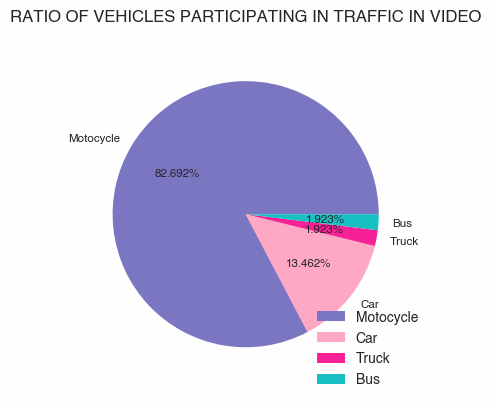

In [4]:
sizes = np.array([len(df_oneDay_moto), len(df_oneDay_car), len(df_oneDay_truck), len(df_oneDay_bus)])
labels = ["Motocycle", "Car", "Truck", "Bus"]
plt.subplots()

plt.pie(sizes, labels=labels, autopct='%1.3f%%', textprops={'size': 'smaller'}, radius=0.9)
plt.legend()
plt.title("RATIO OF VEHICLES PARTICIPATING IN TRAFFIC IN VIDEO")  # add title 
plt.show()

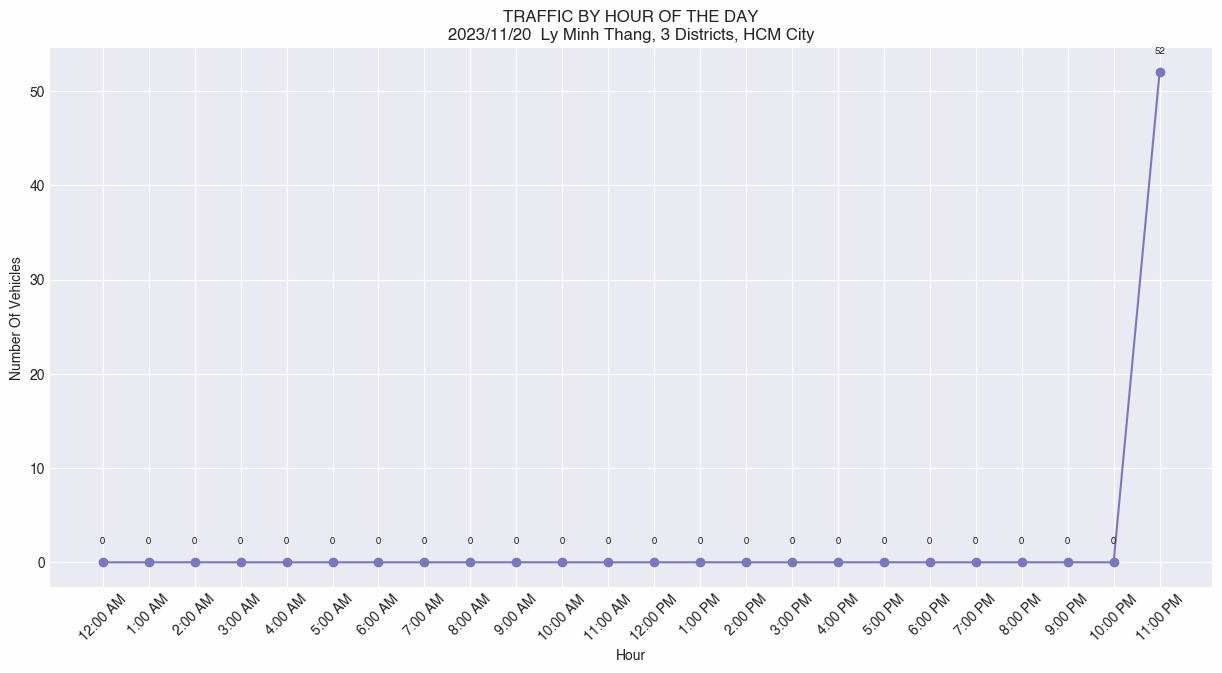

In [5]:
# Define X and Y variable data 
in_hour_count = []
for i in range(24):
	in_hour_count.append(len(df_oneDay[df_oneDay['Hour'] == i]))
      
df_oneday_chart = pd.DataFrame(list(zip(in_hour_count,hour_label)), columns=['Hour', 'Count'])
plt.figure(figsize=(15,7))
plt.xlabel("Hour")  # add X-axis label 
plt.xticks(rotation=45)
plt.ylabel("Number Of Vehicles")  # add Y-axis label 

plt.plot(df_oneday_chart['Count'], df_oneday_chart['Hour'], marker='o')
for j, v in enumerate(df_oneday_chart['Hour']):
    plt.text(j, v+2, str(v), fontsize=7, horizontalalignment='center')
    
plt.title("TRAFFIC BY HOUR OF THE DAY\n2023/11/20  Ly Minh Thang, 3 Districts, HCM City")  # add title 

plt.show()


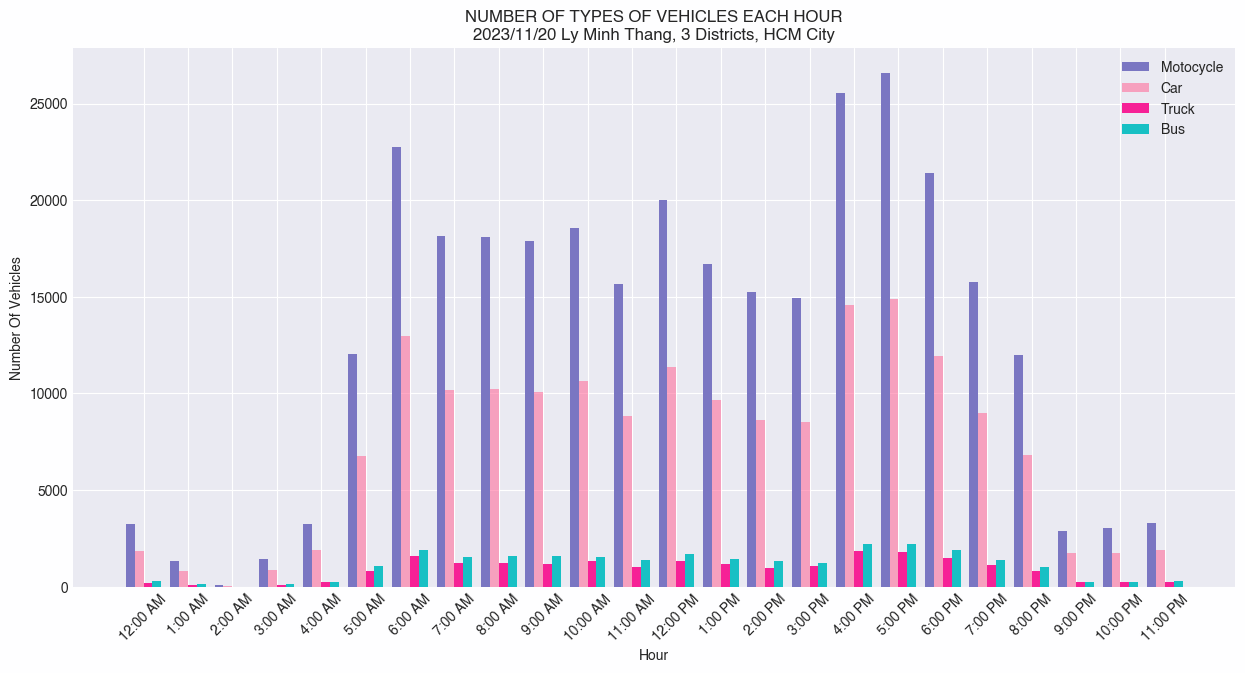

In [93]:
# create data 
col = np.arange(24) 
moto_in_hour_count = []
car_in_hour_count = []
truck_in_hour_count = []
bus_in_hour_count = []
for i in range(24):
	moto_in_hour_count.append(len(df_oneDay_moto[df_oneDay_moto['Hour'] == i]))
	car_in_hour_count.append(len(df_oneDay_car[df_oneDay_car['Hour'] == i]))
	truck_in_hour_count.append(len(df_oneDay_truck[df_oneDay_truck['Hour'] == i]))
	bus_in_hour_count.append(len(df_oneDay_bus[df_oneDay_bus['Hour'] == i]))

width = 0.2
  
# plot data in grouped manner of bar type 
plt.figure(figsize=(15,7))
plt.bar(col-0.3, moto_in_hour_count, width) 
plt.bar(col-0.1, car_in_hour_count, width) 
plt.bar(col+0.1, truck_in_hour_count, width) 
plt.bar(col+0.3, bus_in_hour_count, width) 
plt.xticks(col, hour_label, rotation=45) 
plt.xlabel("Hour")  # add X-axis label 
plt.ylabel("Number Of Vehicles")  # add Y-axis label 
plt.legend(["Motocycle", "Car", "Truck", "Bus"]) 

plt.title("NUMBER OF TYPES OF VEHICLES EACH HOUR\n2023/11/20 Ly Minh Thang, 3 Districts, HCM City")  # add title 

plt.show() 

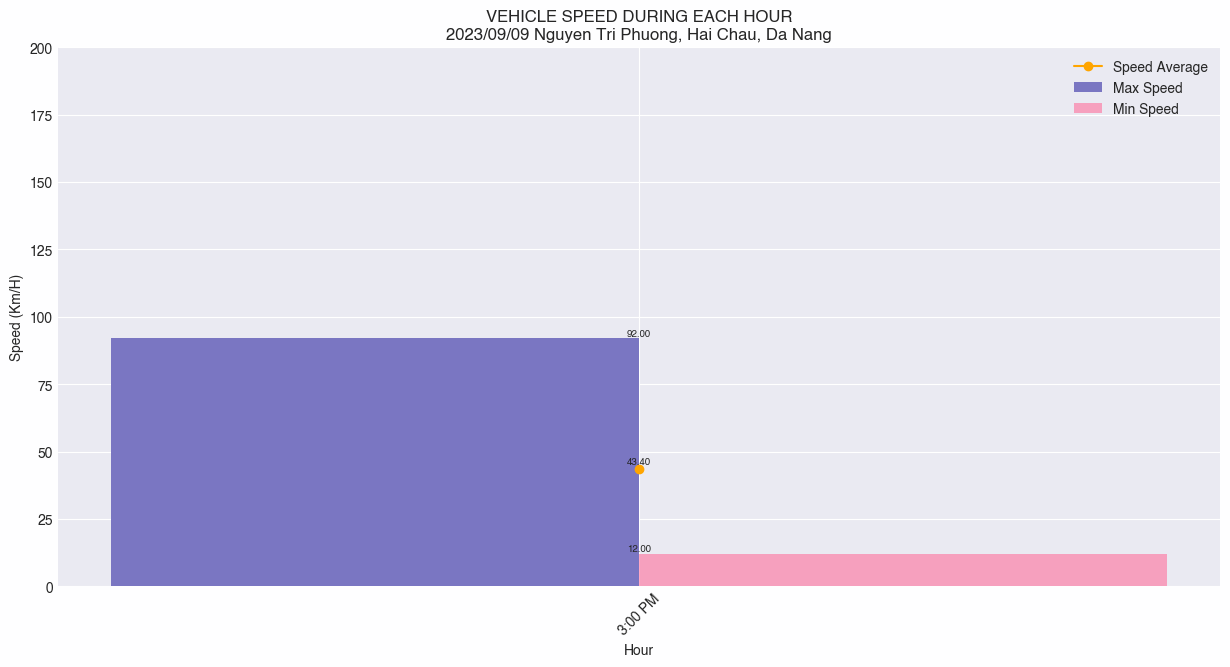

In [12]:
# create data 
col = np.arange(1) 
speed_average_in_hour = []
max_speed_in_hour = []
min_speed_in_hour = []


speed_average_in_hour.append(np.average(df_oneDay['Speed']))
max_speed_in_hour.append(np.max(df_oneDay['Speed']))
min_speed_in_hour.append(np.min(df_oneDay['Speed']))

width = 0.1
  
# plot data in grouped manner of bar type 
plt.figure(figsize=(15,7))
plt.plot(col, speed_average_in_hour, marker='o', color='orange')
plt.bar(col-0.05, max_speed_in_hour, width) 
plt.bar(col+0.05, min_speed_in_hour, width) 

plt.xticks(col, ["3:00 PM"], rotation=45) 
plt.xlabel("Hour")  # add X-axis label 
plt.ylabel("Speed (Km/H)")  # add Y-axis label 
plt.legend(["Speed Average", "Max Speed", "Min Speed"])

ax = plt.gca()
ax.set_ylim([0, 200])

for j, v in enumerate(speed_average_in_hour):
    plt.text(j, v+2, str('{:.2f}'.format(v)), fontsize=7, horizontalalignment='center')
for j, v in enumerate(max_speed_in_hour):
    plt.text(j, v+1, str('{:.2f}'.format(v)), fontsize=7, horizontalalignment='center')
for j, v in enumerate(min_speed_in_hour):
    plt.text(j, v+1, str('{:.2f}'.format(v)), fontsize=7, horizontalalignment='center')

plt.title("VEHICLE SPEED DURING EACH HOUR\n2023/09/09 Nguyen Tri Phuong, Hai Chau, Da Nang")  # add title 

plt.show() 

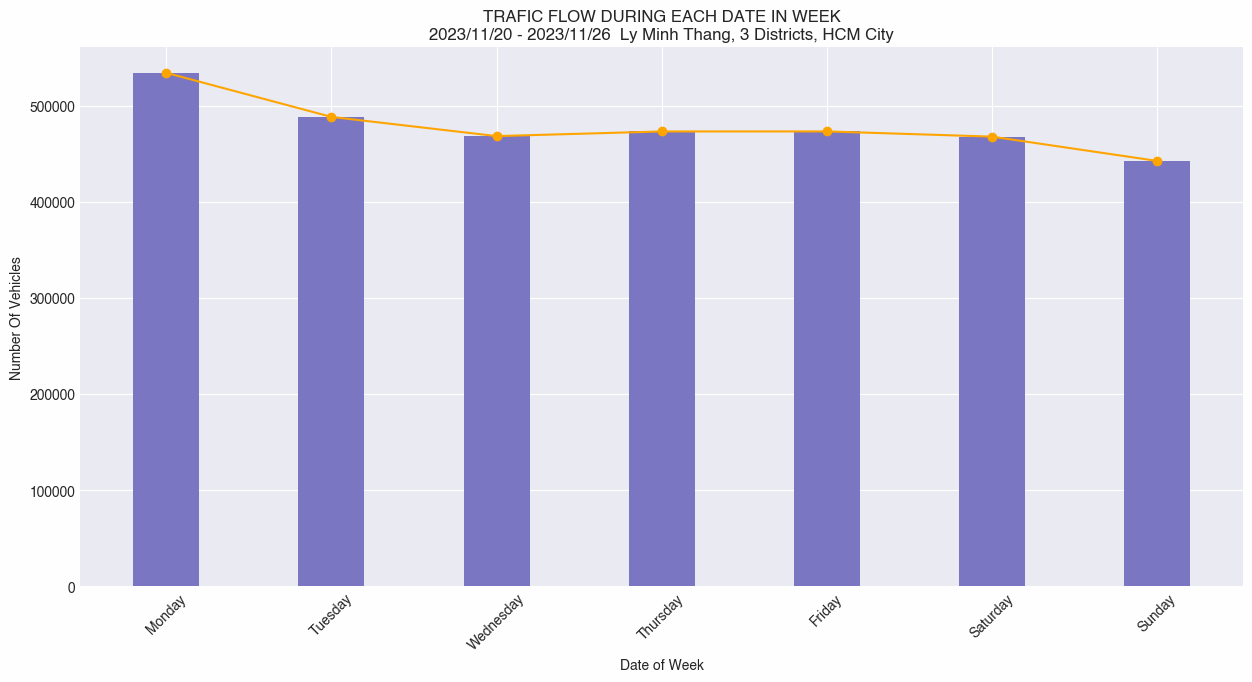

In [95]:
col = np.arange(7) 
vehicle_count_per_day = []
for i in range(7):
	vehicle_count_per_day.append(len(df_main[df_main['Day'] == str("2023-11-2" + str(i))]))

width = 0.4
  
# plot data in grouped manner of bar type 
plt.figure(figsize=(15,7))
plt.plot(col, vehicle_count_per_day, marker='o', color='orange')
plt.bar(col, vehicle_count_per_day, width) 

plt.xticks(col, date_label, rotation=45) 
plt.xlabel("Date of Week")  # add X-axis label 
plt.ylabel("Number Of Vehicles")  # add Y-axis label 

plt.title("TRAFIC FLOW DURING EACH DATE IN WEEK\n2023/11/20 - 2023/11/26  Ly Minh Thang, 3 Districts, HCM City")  # add title 

plt.show() 


## Comparition

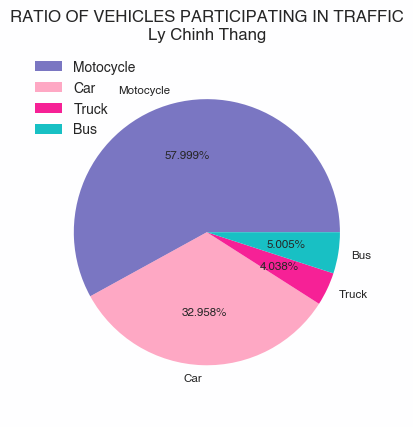

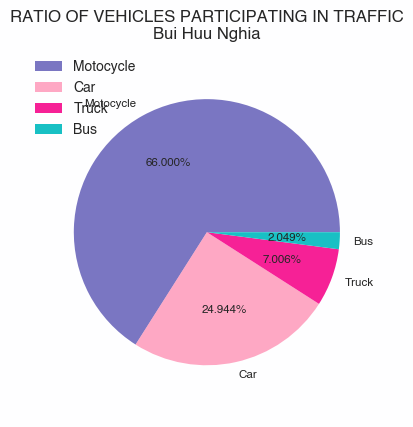

In [96]:
sizes = np.array([len(df_oneDay_moto), len(df_oneDay_car), len(df_oneDay_truck), len(df_oneDay_bus)])
labels = ["Motocycle", "Car", "Truck", "Bus"]
plt.subplots()

plt.pie(sizes, labels=labels, autopct='%1.3f%%', textprops={'size': 'smaller'}, radius=0.9)
plt.legend()
plt.title("RATIO OF VEHICLES PARTICIPATING IN TRAFFIC\nLy Chinh Thang")  # add title 
plt.show()

sizes2 = np.array([len(df_oneDay2_moto), len(df_oneDay2_car), len(df_oneDay2_truck), len(df_oneDay2_bus)])
plt.subplots()

plt.pie(sizes2, labels=labels, autopct='%1.3f%%', textprops={'size': 'smaller'}, radius=0.9)
plt.legend()
plt.title("RATIO OF VEHICLES PARTICIPATING IN TRAFFIC\nBui Huu Nghia")  # add title 
plt.show()

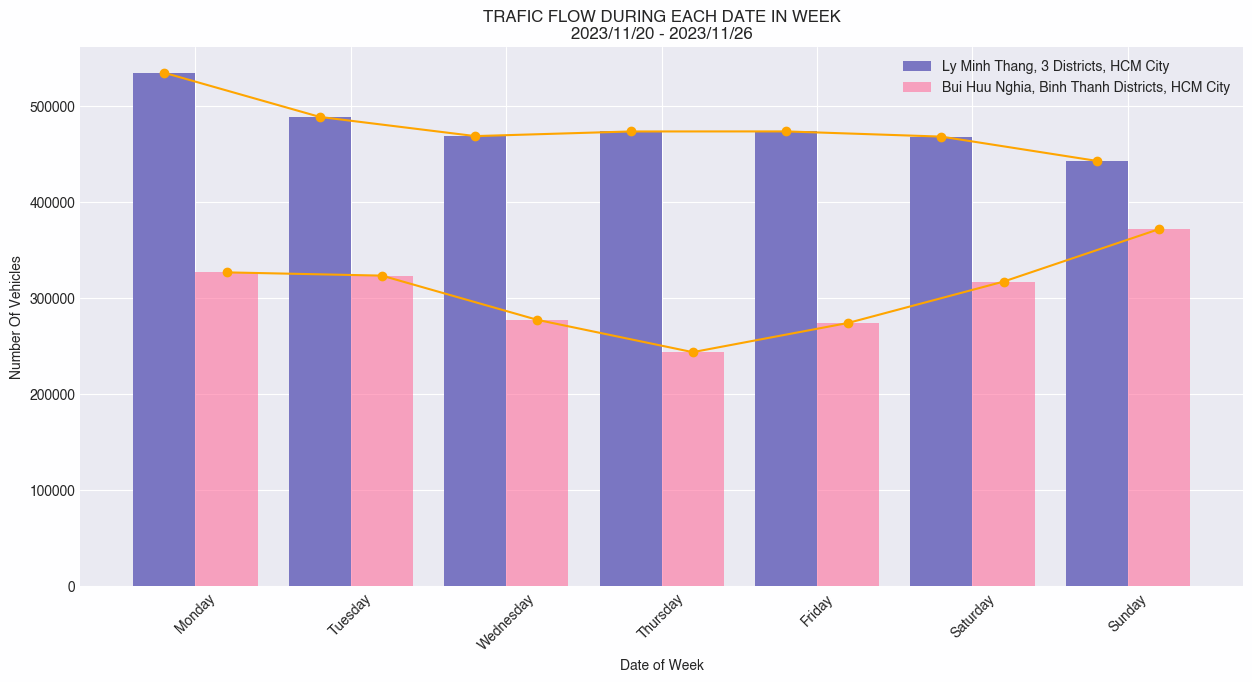

In [97]:
col = np.arange(7) 
vehicle_count_per_day = []
vehicle_count_per_day2 = []
for i in range(7):
	vehicle_count_per_day.append(len(df_main[df_main['Day'] == str("2023-11-2" + str(i))]))
for i in range(7):
	vehicle_count_per_day2.append(len(df_main2[df_main2['Day'] == str("2023-11-2" + str(i))]))

width = 0.4
  
# plot data in grouped manner of bar type 
plt.figure(figsize=(15,7))
plt.bar(col-0.2, vehicle_count_per_day, width)
plt.bar(col+0.2, vehicle_count_per_day2, width) 
plt.legend(["Ly Minh Thang, 3 Districts, HCM City", "Bui Huu Nghia, Binh Thanh Districts, HCM City"])

plt.plot(col-0.2, vehicle_count_per_day, marker='o', color='orange')
plt.plot(col+0.2, vehicle_count_per_day2, marker='o', color='orange')

plt.xticks(col, date_label, rotation=45) 
plt.xlabel("Date of Week")  # add X-axis label 
plt.ylabel("Number Of Vehicles")  # add Y-axis label 

plt.title("TRAFIC FLOW DURING EACH DATE IN WEEK\n2023/11/20 - 2023/11/26")  # add title 

plt.show() 


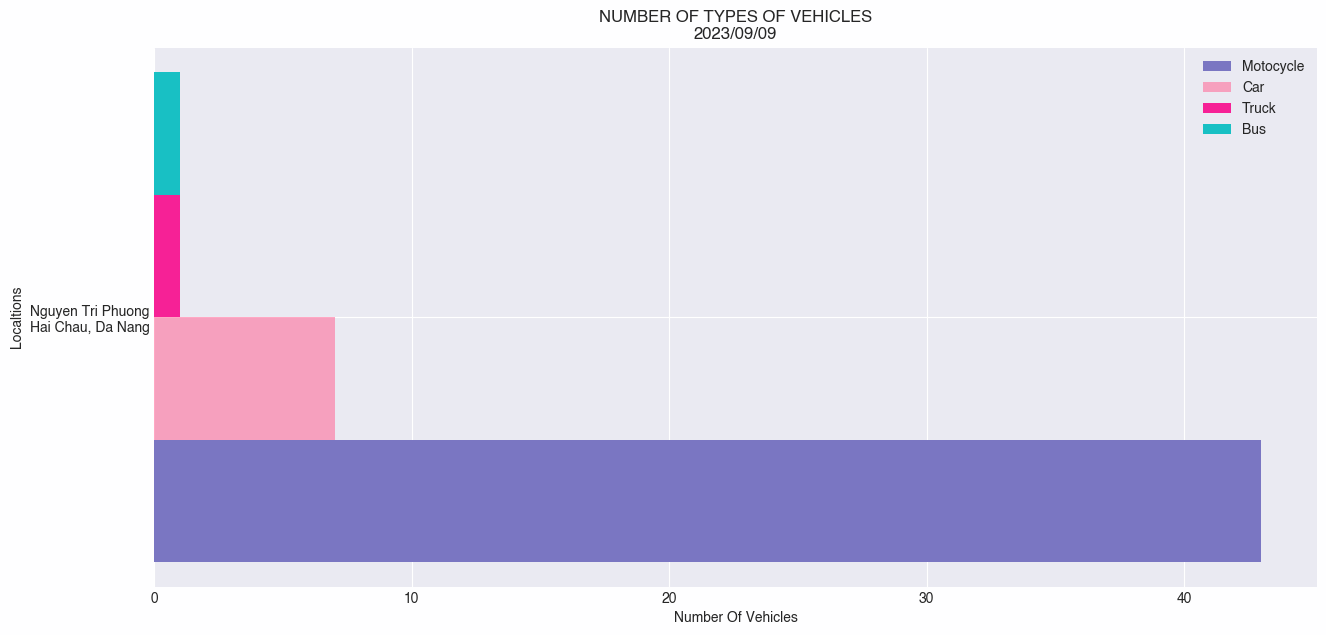

In [9]:
# create data 
col = np.arange(1) 
moto_in_hour_count = [len(df_oneDay_moto)]
car_in_hour_count = [len(df_oneDay_car)]
truck_in_hour_count = [len(df_oneDay_truck)]
bus_in_hour_count = [len(df_oneDay_bus)]
label = ["Nguyen Tri Phuong\nHai Chau, Da Nang"]
width = 0.2
  
# plot data in grouped manner of bar type 
plt.figure(figsize=(15,7))
plt.barh(col-0.3, moto_in_hour_count, width) 
plt.barh(col-0.1, car_in_hour_count, width) 
plt.barh(col+0.1, truck_in_hour_count, width) 
plt.barh(col+0.3, bus_in_hour_count, width) 
plt.yticks(col, label)
plt.ylabel("Localtions")  # add X-axis label 
plt.xlabel("Number Of Vehicles")  # add Y-axis label 
plt.legend(["Motocycle", "Car", "Truck", "Bus"]) 

plt.title("NUMBER OF TYPES OF VEHICLES\n2023/09/09")  # add title 

plt.show() 